# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 2 hours**. For this time interval, using the values of the **4 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train a Boosting model for the task. Choose the model based on the number, and type of features available.**



Features:

* Date: Time window of ten minutes.
* Temperature: Weather Temperature.
* Humidity: Weather Humidity.
* WindSpeed: Wind Speed.
* GeneralDiffuseFlows: “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DiffuseFlows

Target:

SolarPower

## Dataset links:
* [DS1](https://drive.google.com/file/d/1-Pcpb1xWpKc8Cgs-P7xqBFHw2NM0dBsA/view?usp=sharing)
* [DS2](https://drive.google.com/file/d/1-Pul07w6LXpm-uo99qbNc86FHhwl4yQD/view?usp=sharing)

## Read the datasets

In [ ]:
import pandas as pd

data1 = pd.read_csv('power_consumption_g3_feat.csv')
data2 = pd.read_csv('power_consumption_g3.csv')

In [ ]:
data1.head()

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900


In [ ]:
data2.head()

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766


## Merge the datasets (and pre-processing if needed)

In [ ]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1 = data1.set_index('Date')

In [ ]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2 = data2.set_index('Date')

## Group the datasets into time intervals of 2 hours

In [ ]:
data = data1.merge(data2, how='left', right_index = True, left_index = True)

In [ ]:
data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300,32243.74468
2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630,26356.94352
2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322,46962.27571
2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111,22173.55932
2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900,33328.34043


In [ ]:
data.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

<Axes: >

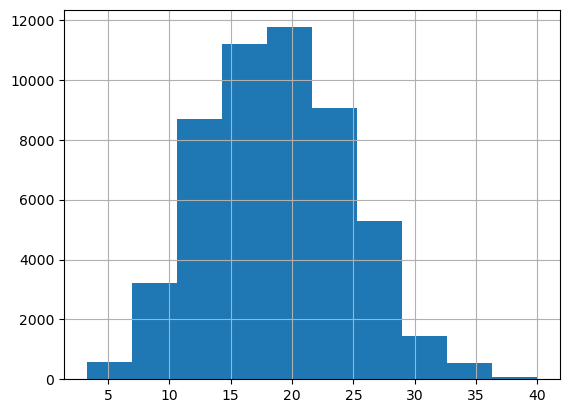

In [ ]:
data['Temperature'].hist()

In [ ]:
data['Temperature'] = data['Temperature'].fillna(value = data['Temperature'].median())

<Axes: >

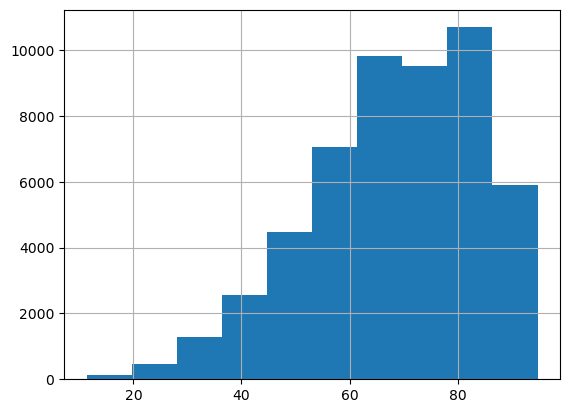

In [ ]:
data['Humidity'].hist()

In [ ]:
data['Humidity'] = data['Humidity'].fillna(value = data['Humidity'].median())

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'WindSpeed'}>,
        <Axes: title={'center': 'GeneralDiffuseFlows'}>],
       [<Axes: title={'center': 'DiffuseFlows'}>,
        <Axes: title={'center': 'SolarPower'}>]], dtype=object)

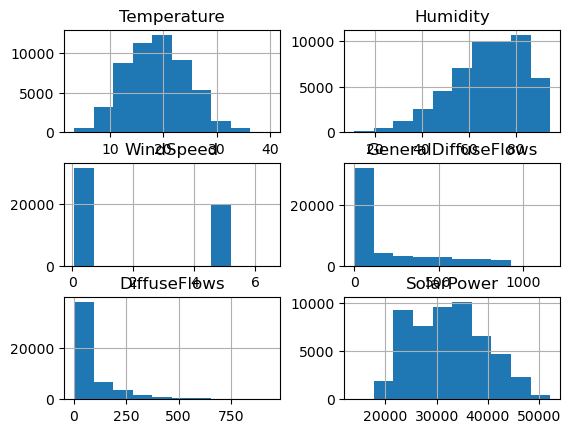

In [ ]:
data.hist()

In [ ]:
data.isnull().sum()

Temperature              0
Humidity                 0
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
data[['WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']] = imputer.fit_transform(data[['WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']])

In [ ]:
data.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [ ]:
data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300,32243.74468
2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630,26356.94352
2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322,46962.27571
2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111,22173.55932
2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900,33328.34043


In [ ]:
grouped = data.resample('2h').mean()
grouped

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.951750,75.630833,0.081917,0.060167,0.105667,26927.594937
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872
...,...,...,...,...,...,...
2017-12-30 14:00:00,14.513333,42.018333,0.077667,409.650000,42.163333,29293.789606
2017-12-30 16:00:00,14.015000,45.455833,0.077500,153.905000,152.368333,31262.864386
2017-12-30 18:00:00,10.112500,61.041667,0.075583,1.618917,1.676750,37721.673005


## Create lags

In [ ]:
lag = 4

In [ ]:
columns = grouped.columns

In [ ]:
for i in range(1, lag+1):
  for col in columns:
    grouped[f'{col}_prev_{i}'] = grouped[col].shift(i)

In [ ]:
grouped = grouped.sort_index()

In [ ]:
grouped.head(10)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_prev1,Humidity_prev1,WindSpeed_prev1,GeneralDiffuseFlows_prev1,...,WindSpeed_prev3,GeneralDiffuseFlows_prev3,DiffuseFlows_prev3,SolarPower_prev3,Temperature_prev4,Humidity_prev4,WindSpeed_prev4,GeneralDiffuseFlows_prev4,DiffuseFlows_prev4,SolarPower_prev4
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.951750,75.630833,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,6.951750,75.630833,0.081917,0.060167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 04:00:00,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,5.029333,78.008333,0.082583,0.061417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 06:00:00,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,...,0.081917,0.060167,0.105667,26927.594937,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 08:00:00,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,...,0.082583,0.061417,0.135083,21447.088607,6.951750,75.630833,0.081917,0.060167,0.105667,26927.594937
2017-01-01 10:00:00,8.019333,63.835833,2.913333,328.986648,34.108333,27986.835442,4.632167,73.791667,0.082417,79.281917,...,0.081667,0.061917,0.120833,20641.518987,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607
2017-01-01 12:00:00,15.263333,57.075000,0.076167,486.391667,40.981667,30060.759495,8.019333,63.835833,2.913333,328.986648,...,0.082417,0.063583,0.122500,20094.683545,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987
2017-01-01 14:00:00,15.662500,56.914167,0.075667,377.458333,48.125000,29558.481012,15.263333,57.075000,0.076167,486.391667,...,0.082417,79.281917,15.761833,21255.189872,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545
2017-01-01 16:00:00,15.309167,59.112500,0.077250,160.075833,169.773333,31576.708860,15.662500,56.914167,0.075667,377.458333,...,2.913333,328.986648,34.108333,27986.835442,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872


In [ ]:
data = data.dropna(axis=0)

# Split the dataset into 80% training and 20% testing datasets

In [ ]:
features = data.columns.drop(['Temperature',	'Humidity',	'WindSpeed',	'GeneralDiffuseFlows',	'DiffuseFlows', 'SolarPower'])

In [ ]:
X, Y = data[features], data['SolarPower']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Create the model, pre-process the data and make it suitable for training

In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 435.7 kB/s eta 0:04:47
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 0.5/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 1.0/124.9 MB 4.4 MB/s eta 0:00:29
    --------------------------------------- 2.5/124.9 MB 8.8 MB/s eta 0:00:14
    --------------------------------------- 2.5/124.9 MB 8.8 MB/s eta 0:00:14
    --------------------------------------- 2.7/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 3.7/124.9 MB 8.9 MB/s eta 0:00:14
   - -------------------------------------- 4.4/124.9 MB 9.8 MB/s eta 0:00:13
   - -------------------------------------- 5.0/124.9 MB 9.9 MB/s eta 0:00

In [ ]:
from xgboost import XGBRegressor

In [ ]:
clf = XGBRegressor(n_estimators=50, max_depth=4, learning_rate = 0.0001, objective="reg:linear", num_class=1)

In [ ]:
clf.fit(X_train, Y_train)

C:\Users\vikto\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:42:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None, num_class=1,
             num_parallel_tree=None, ...)

## Perofrm hyper-parameter optimization with a 5-fold cross validation.

Important: Do not use many values for the hyper-parameters due to time constraints.

KEEP IN MIND THE DATASET IS TIME-SERIES.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from xgboost import XGBRegressor
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [50, 100],  # Број на дрва
    'learning_rate': [0.01, 0.1],  # Стапка на учење
    'max_depth': [3, 5]  # Длабочина на дрвата
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_absolute_error',  # Мерка за грешка
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Score: 1945.3314316636904


## Fit the model with the best parameters on the training dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

In [ ]:
best_params = grid_search.best_params_
best_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)

In [ ]:
best_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Calculate the adequate metrics on the testing dataset

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 1363.7653330177347
Mean Squared Error (MSE): 3306336.412513255
R^2 Score: 0.9074812516468436


## Visualize the targets against the predictions

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

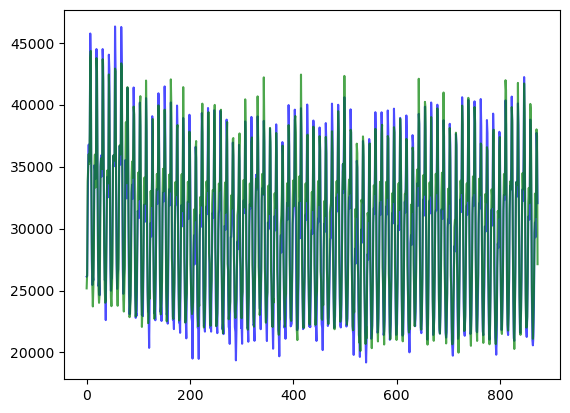

In [ ]:
plt.plot(Y_test.values, label='True Values', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predictions', color='green', alpha=0.7)